In [1]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip -qo dogImages.zip
!rm dogImages.zip

--2022-07-19 11:12:02--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.208
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1,1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1,05G  15,0MB/s    in 86s     

2022-07-19 11:13:29 (12,6 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [4]:
!pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.2 MB/s eta 0:00:0031m12.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.9 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 27.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 KB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1
You should consider upgrading via the '/home/endri/Documents/dog-breed-classification-ml/venv/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob
from PIL import Image
from PIL import ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES = True

In [8]:
LR = 6e-4
BATCH_SIZE = 32
NUMBER_OF_NODES = 256
EPOCHS = 4
IMG_SIZE = 224

In [9]:
def get_train_generator():
    data_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=.2,
        height_shift_range=.2,
        brightness_range=[0.5,1.5],
        horizontal_flip=True
    )
    return data_datagen.flow_from_directory(
        "dogImages/train/",
        target_size=(int(IMG_SIZE), int(IMG_SIZE)),
        batch_size=int(BATCH_SIZE),
        
    )

def get_valid_generator():
    data_datagen = ImageDataGenerator(rescale=1./255)
    return data_datagen.flow_from_directory(
        "dogImages/valid/",
        target_size=(int(IMG_SIZE), int(IMG_SIZE)),
        batch_size=int(BATCH_SIZE)
    )

def get_test_generator():
    data_datagen = ImageDataGenerator(rescale=1./255)
    return data_datagen.flow_from_directory(
        "dogImages/test/",
        target_size=(int(IMG_SIZE), int(IMG_SIZE)),
        batch_size=int(BATCH_SIZE)
    )

In [10]:
dog_classifier = tf.keras.applications.ResNet50V2(
    weights="imagenet",
    input_shape=(int(IMG_SIZE), int(IMG_SIZE), 3)
)

2022-07-19 11:19:31.308134: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-19 11:19:31.346089: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2096074999 Hz
2022-07-19 11:19:31.346869: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x30f05f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-19 11:19:31.346901: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-07-19 11:19:31.350220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1257] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-07-19 11:19:31.350303: I tensorflow/core/common_runtime/gpu/gpu_device.c

102875136/102869336 [==============================] - 6s 0us/step


In [11]:
def is_dog(data):
    probs = dog_classifier.predict(data)
    preds = tf.argmax(probs, axis=1)
    return ((preds >= 151) & (preds <= 268))

In [12]:
train_generator = get_train_generator()
batch = train_generator.next()
predictions = is_dog(batch)

Found 6680 images belonging to 133 classes.


2022-07-19 11:21:33.169485: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 102760448 exceeds 10% of free system memory.
2022-07-19 11:21:33.318628: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 106463232 exceeds 10% of free system memory.
2022-07-19 11:21:33.427527: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 102760448 exceeds 10% of free system memory.
2022-07-19 11:21:33.610638: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 102760448 exceeds 10% of free system memory.
2022-07-19 11:21:33.723782: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 102760448 exceeds 10% of free system memory.


In [13]:
n_dog = np.sum(predictions)
dog_percentage = n_dog/int(BATCH_SIZE)

print('{:.0%} of the files have a detected dog'.format(dog_percentage))

100% of the files have a detected dog


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation="relu", input_shape=(int(IMG_SIZE), int(IMG_SIZE), 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(int(NUMBER_OF_NODES), activation="relu"),
    tf.keras.layers.Dense(133, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0

In [16]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=float(LR)),
    loss=tf.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [17]:
train_generator = get_train_generator()
valid_generator = get_valid_generator()

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="custom_classifier_logs")

model.fit(train_generator, epochs=2,
    validation_data=valid_generator,
    callbacks=[tb_callback]
)

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.


2022-07-19 11:22:57.374419: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-07-19 11:22:57.374530: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1391] Profiler found 1 GPUs
2022-07-19 11:22:57.374901: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcupti.so.10.1'; dlerror: libcupti.so.10.1: cannot open shared object file: No such file or directory
2022-07-19 11:22:57.374989: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcupti.so'; dlerror: libcupti.so: cannot open shared object file: No such file or directory
2022-07-19 11:22:57.375006: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1441] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.


Epoch 1/2
  1/209 [..............................] - ETA: 0s - loss: 4.8866 - accuracy: 0.0000e+00

2022-07-19 11:23:02.053377: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session started.
2022-07-19 11:23:02.053498: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1441] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI could not be loaded or symbol could not be found.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.
  2/209 [..............................] - ETA: 2:30 - loss: 4.8937 - accuracy: 0.0000e+00

2022-07-19 11:23:03.494503: I tensorflow/core/profiler/internal/gpu/device_tracer.cc:223]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-07-19 11:23:03.499004: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: custom_classifier_logs/train/plugins/profile/2022_07_19_11_23_03
2022-07-19 11:23:03.500363: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for trace.json.gz to custom_classifier_logs/train/plugins/profile/2022_07_19_11_23_03/endri-VivoBook-ASUSLaptop-X570DD-M570DD.trace.json.gz
2022-07-19 11:23:03.504385: I tensorflow/core/profiler/rpc/client/save_profile.cc:176] Creating directory: custom_classifier_logs/train/plugins/profile/2022_07_19_11_23_03
2022-07-19 11:23:03.504751: I tensorflow/core/profiler/rpc/client/save_profile.cc:182] Dumped gzipped tool data for memory_profile.json.gz to custom_classifier_logs/train/plugins/profile/2022_07_19_11_23_03/endri-VivoBook-ASUSLaptop-X570DD-M57

209/209 [==============================] - 281s 1s/step - loss: 4.8834 - accuracy: 0.0085 - val_loss: 4.8691 - val_accuracy: 0.0108
Epoch 2/2
209/209 [==============================] - 249s 1s/step - loss: 4.8704 - accuracy: 0.0100 - val_loss: 4.8619 - val_accuracy: 0.0180


In [18]:
test_generator = get_test_generator()

test_loss_custom, test_accuracy_custom = model.evaluate(test_generator)

print(f"The accuracy in the test set is {test_accuracy_custom:.3f}.")

Found 836 images belonging to 133 classes.
27/27 [==============================] - 7s 276ms/step - loss: 4.8481 - accuracy: 0.0156
The accuracy in the test set is 0.016.


In [19]:
vgg_body = tf.keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(int(IMG_SIZE), int(IMG_SIZE), 3)
)

58892288/58889256 [==============================] - 2s 0us/step


In [20]:
vgg_body.trainable = False

In [21]:
inputs = tf.keras.layers.Input(shape=(int(IMG_SIZE), int(IMG_SIZE), 3))
# We make sure that the vgg_body is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = vgg_body(inputs, training=False)
# Convert features of shape `vgg_body.output_shape[1:]` to vectors
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier (categorical classification)
outputs = tf.keras.layers.Dense(133, activation="softmax")(x)

vgg_model = tf.keras.Model(inputs, outputs)

In [22]:
vgg_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 14,782,917
Trainable params: 68,229
Non-trainable params: 14,714,688
_________________________________________________________________


In [23]:
vgg_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=float(LR)),
    loss=tf.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [24]:
train_generator = get_train_generator()
valid_generator = get_valid_generator()

vgg_model.fit(train_generator, epochs=2,
    validation_data=valid_generator
)

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
Epoch 1/2
209/209 [==============================] - 2520s 12s/step - loss: 4.8641 - accuracy: 0.0207 - val_loss: 4.7239 - val_accuracy: 0.0323
Epoch 2/2
209/209 [==============================] - 2559s 12s/step - loss: 4.6846 - accuracy: 0.0537 - val_loss: 4.5761 - val_accuracy: 0.0826


In [25]:
test_generator = get_test_generator()

test_loss_vgg, test_accuracy_vgg = vgg_model.evaluate(test_generator)

print(f"The accuracy in the test set is {test_accuracy_vgg:.3f}.")

Found 836 images belonging to 133 classes.
27/27 [==============================] - 262s 10s/step - loss: 4.5577 - accuracy: 0.0885
The accuracy in the test set is 0.089.


In [26]:
resnet_body = tf.keras.applications.ResNet50V2(
    weights="imagenet",
    include_top=False,
    input_shape=(int(IMG_SIZE), int(IMG_SIZE), 3)
)

94674944/94668760 [==============================] - 4s 0us/step


In [27]:
resnet_body.trainable = False

In [28]:
inputs = tf.keras.layers.Input(shape=(int(IMG_SIZE), int(IMG_SIZE), 3))
# We make sure that the vgg_body is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = resnet_body(inputs, training=False)
# Convert features of shape `vgg_body.output_shape[1:]` to vectors
x = tf.keras.layers.Flatten()(x)
# A Dense classifier (categorical classification)
outputs = tf.keras.layers.Dense(133, activation="softmax")(x)

resnet_model = tf.keras.Model(inputs, outputs)

In [29]:
resnet_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=float(LR)),
    loss=tf.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [30]:
train_generator = get_train_generator()
valid_generator = get_valid_generator()

resnet_model.fit(train_generator, epochs=int(EPOCHS),
    validation_data=valid_generator
)

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
Epoch 1/4
209/209 [==============================] - 758s 4s/step - loss: 12.4688 - accuracy: 0.4555 - val_loss: 8.4943 - val_accuracy: 0.6527
Epoch 2/4
209/209 [==============================] - 906s 4s/step - loss: 9.5765 - accuracy: 0.6545 - val_loss: 10.0752 - val_accuracy: 0.6551
Epoch 3/4
209/209 [==============================] - 930s 4s/step - loss: 8.0102 - accuracy: 0.7232 - val_loss: 10.1710 - val_accuracy: 0.7018
Epoch 4/4
209/209 [==============================] - 820s 4s/step - loss: 7.4697 - accuracy: 0.7602 - val_loss: 10.4768 - val_accuracy: 0.6970


In [31]:
test_generator = get_test_generator()

test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_generator)

print(f"The accuracy in the test set is {test_accuracy_resnet:.3f}.")



Found 836 images belonging to 133 classes.
27/27 [==============================] - 94s 3s/step - loss: 11.6476 - accuracy: 0.6926
The accuracy in the test set is 0.693.


In [32]:
idx_to_class = {value: key for key, value in train_generator.class_indices.items()}

def predict_breed(images):
    probs = resnet_model.predict(images)
    pred = tf.argmax(probs, axis=1)
    label = idx_to_class[pred.numpy()[0]]
    return label.split(".")[-1]

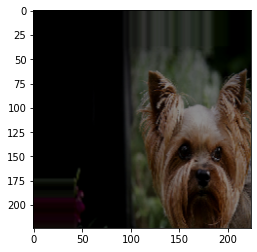

This photo looks like a(n) Chinese_crested.


In [33]:
def predict_dog(image):
    image = image[None,...]
    if is_dog(image):
        pred =  predict_breed(image)
        print(f"This photo looks like a(n) {pred}.")
        return

    print("No dog detected")

image = train_generator.next()[0][0]
plt.imshow(image)
plt.show()
pred = predict_dog(image)

In [34]:
for img_path in sorted(glob("check_images/*")):
    print(img_path)
    img = Image.open(img_path)
    img = img.resize((224, 224))
    
    plt.imshow(img)
    plt.show()
    
    img = np.array(img)
    predict_dog(img)

In [35]:
print(test_accuracy_resnet)

0.6925837397575378
